In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [6]:
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [9]:
import torch
from torchvision import datasets, transforms

In [23]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])])

In [24]:
dataset = datasets.ImageFolder('C:/Users/Aleksei_Bolshukhin/Desktop/computer_vision/2/Classification_data/Classification_data/train', transform=train_transforms)

In [25]:
dataset

Dataset ImageFolder
    Number of datapoints: 14034
    Root location: C:/Users/Aleksei_Bolshukhin/Desktop/computer_vision/2/Classification_data/Classification_data/train
    StandardTransform
Transform: Compose(
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [39]:
dataset.classes

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label : buildings


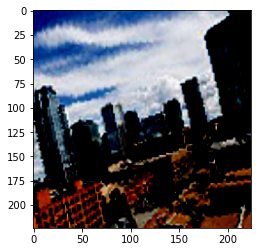

In [41]:
def display_img(img,label):
    print(f"Label : {dataset.classes[label]}")
    plt.imshow(img.permute(1,2,0))

#display the first image in the dataset
display_img(*dataset[1])

In [19]:
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(images)
def show_batch(dl, nmax=64):
    for images in dl:
        show_images(images, nmax)
        break

In [35]:
trainloader = torch.utils.data.DataLoader(dataset, 
                                          batch_size=1000, shuffle=True)

In [28]:
trainloader

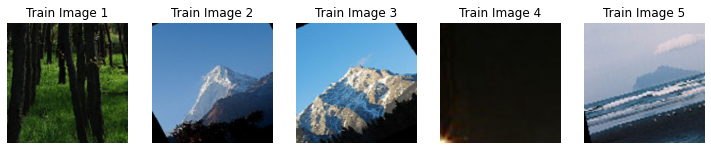

In [36]:
for loader_str, loader in [('Train Image', trainloader)]:
    data_iter = iter(loader)

    images, labels = next(data_iter)
    
    ncol = 5
    fig, axes = plt.subplots(figsize=(12.5,4), 
                             ncols=ncol)
    for ii in range(ncol):
        ax = axes[ii]
        imshow(images[ii], 
               ax=ax, 
               normalize=True)
        ax.set_title('{} {}'.format(loader_str, ii+1))

In [37]:
train_features, train_labels = next(iter(trainloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([1000, 3, 224, 224])
Labels batch shape: torch.Size([1000])


In [38]:
train_labels

tensor([4, 1, 5, 3, 4, 1, 5, 1, 4, 4, 5, 1, 5, 3, 0, 5, 4, 2, 2, 4, 5, 3, 2, 1,
        2, 4, 0, 1, 2, 2, 2, 1, 2, 2, 4, 0, 3, 4, 2, 4, 4, 5, 5, 0, 5, 3, 0, 2,
        3, 1, 2, 3, 5, 1, 4, 4, 4, 4, 2, 4, 2, 0, 0, 4, 2, 5, 0, 3, 5, 3, 1, 1,
        2, 1, 3, 2, 3, 1, 3, 3, 5, 4, 5, 5, 5, 2, 3, 0, 1, 2, 4, 2, 4, 3, 3, 1,
        1, 3, 3, 3, 3, 1, 4, 1, 3, 0, 4, 2, 5, 4, 4, 5, 1, 5, 3, 1, 0, 0, 0, 5,
        2, 3, 5, 1, 3, 3, 3, 5, 2, 0, 2, 4, 4, 1, 2, 3, 3, 3, 4, 4, 4, 2, 4, 1,
        5, 3, 0, 1, 0, 2, 5, 1, 0, 2, 2, 5, 5, 0, 3, 5, 2, 5, 2, 4, 2, 5, 4, 4,
        4, 4, 1, 2, 0, 1, 0, 5, 1, 0, 0, 2, 5, 3, 5, 4, 4, 5, 2, 5, 0, 0, 2, 5,
        5, 3, 3, 0, 5, 0, 0, 2, 0, 0, 2, 4, 0, 3, 0, 2, 1, 3, 0, 0, 4, 4, 3, 5,
        2, 4, 3, 0, 0, 5, 4, 3, 5, 2, 3, 2, 0, 0, 5, 2, 3, 5, 5, 5, 5, 3, 3, 2,
        5, 3, 3, 3, 5, 3, 0, 5, 3, 2, 3, 4, 5, 0, 2, 5, 3, 5, 0, 4, 3, 0, 0, 1,
        1, 0, 3, 2, 2, 2, 3, 2, 2, 5, 2, 3, 4, 1, 3, 2, 4, 3, 2, 4, 0, 3, 4, 3,
        1, 4, 2, 1, 4, 2, 5, 0, 4, 0, 3,

In [15]:
dataloader = torch.utils.data.DataLoader(dataset, 
                                         batch_size=32, 
                                         shuffle=True)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.5, 0.5, 0.5])
        std = np.array([0.5, 0.5, 0.5])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [16]:
images, labels = next(iter(dataloader))
imshow(images[0], normalize=False)

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>

In [2]:
def findHomography(img1, img2):

    # define constants
    MIN_MATCH_COUNT = 10
    MIN_DIST_THRESHOLD = 0.7
    RANSAC_REPROJ_THRESHOLD = 5.0

    # Initiate SIFT detector
    sift = cv2.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # find matches
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m, n in matches:
        if m.distance < MIN_DIST_THRESHOLD * n.distance:
            good.append(m)


    if len(good) > MIN_MATCH_COUNT:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

        H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, RANSAC_REPROJ_THRESHOLD)
        return H

    else: raise Exception("Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT))

In [47]:
def method_esri(multiband_img, panchr_img):

    # calculate ADJ value 
    b,g,r = cv2.split(panchr_img)
    ADJ = b - multiband_img.mean(axis = 2)
    
    # add ADJ value for multiband_img
    img_psh = multiband_img.copy()
    for i in range(multiband_img.shape[0]):
        for j in range(multiband_img.shape[1]):
            if (((multiband_img[i, j, 0] + ADJ[i][j]>0)&(multiband_img[i, j, 0] + ADJ[i][j]<255))
                &((multiband_img[i, j, 1] + ADJ[i][j]>0)&(multiband_img[i, j, 1] + ADJ[i][j]<255))
                &((multiband_img[i, j, 2] + ADJ[i][j]>0)&(multiband_img[i, j, 2] + ADJ[i][j]<255))):
                img_psh[i, j, 0] = multiband_img[i, j, 0] + ADJ[i][j]
                img_psh[i, j, 1] = multiband_img[i, j, 1] + ADJ[i][j]
                img_psh[i, j, 2] = multiband_img[i, j, 2]+ ADJ[i][j]
                
    return img_psh

In [48]:
def pansharpen(multiband_img, panchr_img):
 
    M = findHomography(multiband_img, panchr_img)   
    multiband_img_rotated = cv2.warpPerspective(multiband_img, M, (panchr_img.shape[1], panchromatic_image.shape[0]))
    img_psh = method_esri(multiband_img_rotated, panchromatic_image)
    
    return img_psh

### Load images

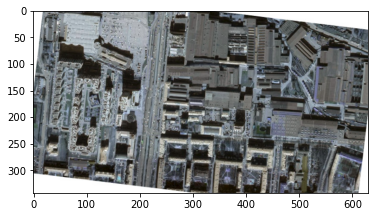

In [53]:
multiband_image_half = cv2.imread('RGB_half.jpg')
plt.imshow(multiband_image_half)

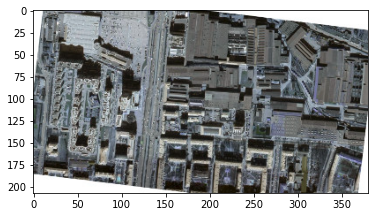

In [54]:
multiband_image_quater = cv2.imread('RGB_quater.jpg')
plt.imshow(multiband_image_quater)

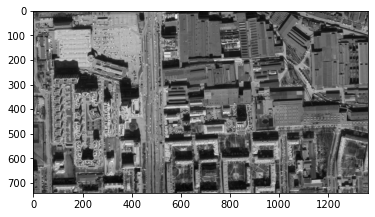

In [55]:
panchromatic_image = cv2.imread('GRAY.jpg')
plt.imshow(panchromatic_image)

### Reconstruct RGB image half

True

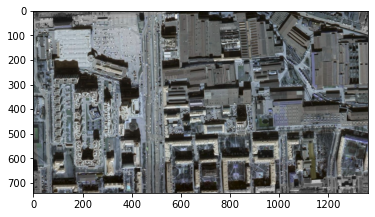

In [60]:
pansharpen_image_half = pansharpen(multiband_image_half, panchromatic_image)
plt.imshow(pansharpen_image_half)
cv2.imwrite('pansharpen_rgb_half.jpg', pansharpen_image_half)

### Reconstruct RGB image quater

True

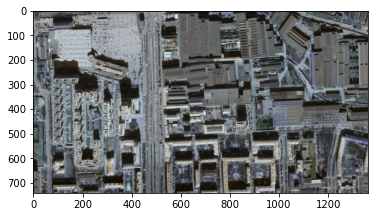

In [61]:
pansharpen_image_quater = pansharpen(multiband_image_quater, panchromatic_image)
plt.imshow(pansharpen_image_quater)
cv2.imwrite('pansharpen_image_quater.jpg', pansharpen_image_quater)

### Summary:  reconstructed images are almost indistinguishable